In [72]:
# Visualization of Particle-in-Cell results
using PyPlot
using PyCall
ov = pyimport("openpmd_viewer")
ts = ov.OpenPMDTimeSeries("/tmp/12_avalanche/hdf5")
tns = 1e9 * ts.t # time in nanoseconds
dt = ts.t[2] - ts.t[1]
nothing

 Activating environment at `~/Sync/projects/2019/iskra/Project.toml`


LoadError: InterruptException:

In [62]:
rcParams = PyDict(matplotlib["rcParams"])
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Routed Gothic"
rcParams["font.size"] = 15
rcParams["axes.linewidth"] = 1
rcParams["scatter.marker"] = "o"
rcParams["xtick.direction"] = "in"
rcParams["ytick.direction"] = "in"
nothing

In [63]:
_, metadata = ts.get_field("phi")
Lx, Ly = metadata.ymax, metadata.xmax
dx, dy = metadata.dy, metadata.dx
xs, ys = metadata.y, metadata.x
nx, ny = length(xs), length(ys)
e  = ts.get_particle(["id"], "e-")
np = length(e[1])
nothing

In [64]:
pt = ov.ParticleTracker(ts, iteration=1, select=Dict("id"=>[0, np]),
    species="e-", preserve_particle_index=false)
it, np = length(ts.iterations), pt.N_selected;
px = zeros(it, np)
py = zeros(it, np)
vx = zeros(it, np)
vy = zeros(it, np)
Ex = zeros(it, ny, nx)
phi = zeros(it, ny, nx)
rho = zeros(it, ny, nx)
nAr = zeros(it, ny, nx)
ne  = zeros(it, ny, nx)
nu1 = zeros(it, ny, nx)
nu2 = zeros(it, ny, nx)
nu3 = zeros(it, ny, nx)
nu4 = zeros(it, ny, nx)

using RegularGrids
vol = reshape(cell_volume(create_uniform_grid(ys, xs)), ny, nx);

In [65]:
using ProgressMeter
@showprogress for i=1:it
    #x, y, ux, uy = ts.get_particle( ["x", "y", "ux", "uy"],
    #    select=pt, iteration=ts.iterations[i], species="e-")
    #px[i, :] = x[:]
    #py[i, :] = y[:]
    #vx[i, :] = ux[:]
    #vy[i, :] = uy[:]
    Ex[i, :, :],= ts.get_field("E", iteration=ts.iterations[i], coord="x")
   phi[i, :, :],= ts.get_field("phi", iteration=ts.iterations[i])
   rho[i, :, :],= ts.get_field("rho", iteration=ts.iterations[i])
   nAr[i, :, :],= ts.get_field("nAr+", iteration=ts.iterations[i])
    ne[i, :, :],= ts.get_field("ne-", iteration=ts.iterations[i])
    nu1[i, :, :, :],= ts.get_field("nuMCC-e--1", iteration=ts.iterations[i])
    nu2[i, :, :, :],= ts.get_field("nuMCC-e--2", iteration=ts.iterations[i])
    nu3[i, :, :, :],= ts.get_field("nuMCC-e--3", iteration=ts.iterations[i])
    nu4[i, :, :, :],= ts.get_field("nuMCC-e--4", iteration=ts.iterations[i])
    
    ne[i, :, :]  .*= vol
    nAr[i, :, :] .*= vol
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:41


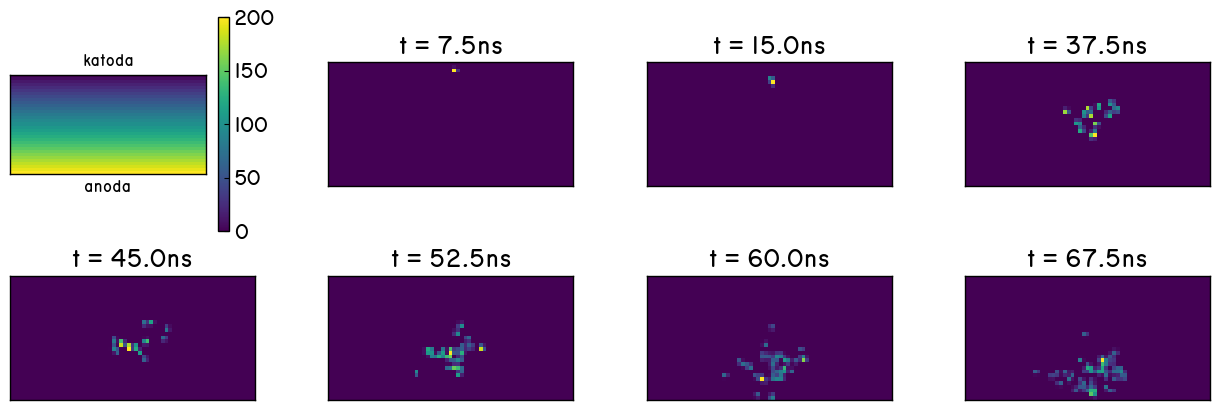

In [67]:
subplot(2,4,1); imshow(ne[1,:,:]'); xticks([]); yticks([]); colorbar()
title("katoda", fontsize=12); xlabel("anoda", fontsize=12)
subplot(2,4,2); imshow(ne[100,:,:]'); title("t = 7.5ns"); xticks([]); yticks([]);
subplot(2,4,3); imshow(ne[200,:,:]'); title("t = 15.0ns"); xticks([]); yticks([]);
subplot(2,4,4); imshow(ne[500,:,:]'); title("t = 37.5ns"); xticks([]); yticks([]);
subplot(2,4,5); imshow(ne[600,:,:]'); title("t = 45.0ns"); xticks([]); yticks([]);
subplot(2,4,6); imshow(ne[700,:,:]'); title("t = 52.5ns"); xticks([]); yticks([]);
subplot(2,4,7); imshow(ne[800,:,:]'); title("t = 60.0ns"); xticks([]); yticks([]);
subplot(2,4,8); imshow(ne[900,:,:]'); title("t = 67.5ns"); xticks([]); yticks([]);
subplots_adjust(top=1.0, right=2.0, wspace=0.3, hspace=0.0)

┌ Info: Saved animation to 
│   fn = /Users/bach/Sync/projects/2019/iskra/problem/anim_fps15.gif
└ @ Plots /Users/bach/.julia/packages/Plots/KN96c/src/animation.jl:104


Plots.AnimatedGif("/Users/bach/Sync/projects/2019/iskra/problem/anim_fps15.gif")
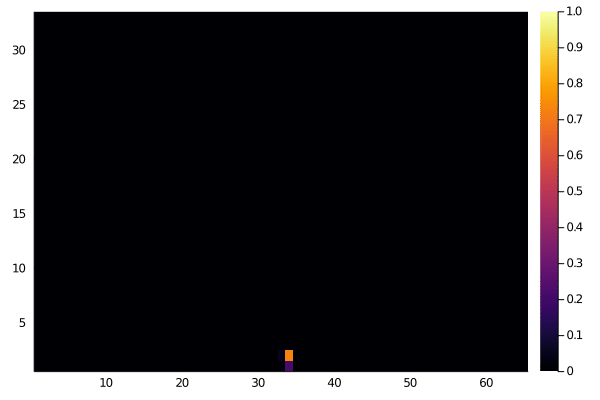

In [68]:
import Plots
anim = @Plots.animate for i=1:1000
    Plots.heatmap(ne[i,:,:]', clims=(0, 1))
end
Plots.gif(anim, "anim_fps15.gif", fps = 15)

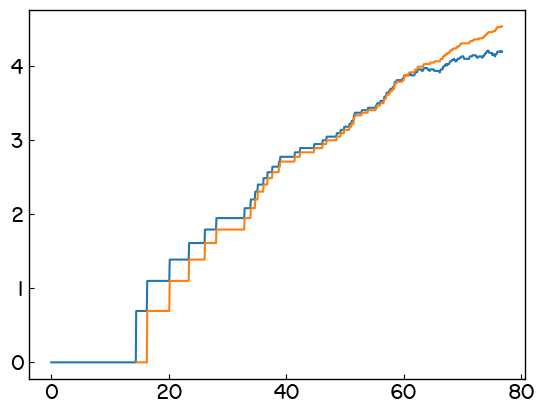

In [71]:
sne = sum(ne; dims=(2,3))
snAr = sum(nAr; dims=(2,3))
plot(tns, log.(sne[:]), "-", tns, log.(snAr[:]), "-");

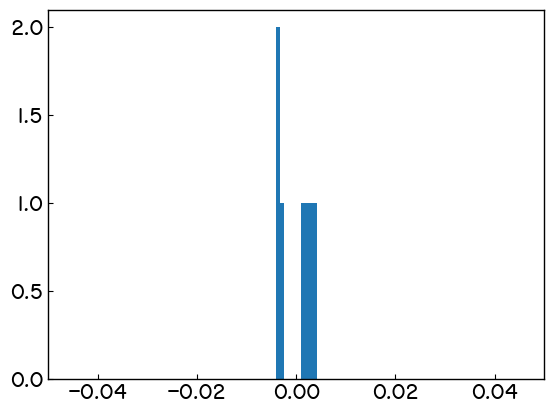

(-0.05, 0.05)

In [61]:
ux = ts.get_particle(["ux"], iteration=ts.iterations[700], species="e-")
hist(ux)
xlim(-0.05, +0.05)

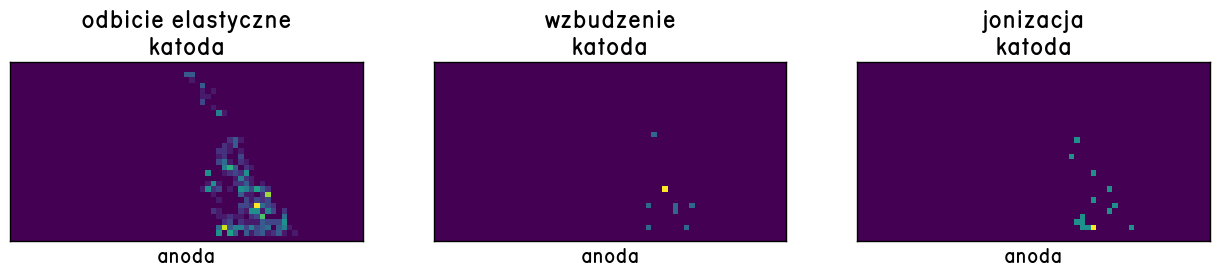

In [49]:
_, sx, sy = size(nu1)
subplot(1,3,1); imshow(reshape(sum(nu1; dims=1), sx, sy)'); xticks([]); yticks([]);
title("odbicie elastyczne\nkatoda"); xlabel("anoda")
subplot(1,3,2); imshow(reshape(sum(nu3 .+ nu2; dims=1), sx, sy)'); title("excitation"); xticks([]); yticks([])
title("wzbudzenie\nkatoda"); xlabel("anoda")
subplot(1,3,3); imshow(reshape(sum(nu4; dims=1), sx, sy)'); xticks([]); yticks([])
title("jonizacja\nkatoda"); xlabel("anoda")
subplots_adjust(right=2.0)